In [ ]:
pip install tensorflow==2.18.0

In [ ]:
pip install protobuf==3.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.16.1 requires protobuf<6.0.0dev,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import os
from glob import glob
from matplotlib import pyplot
import cv2
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import itertools
import sklearn
import scipy
import skimage
from skimage.transform import resize
import csv
from tqdm import tqdm
from sklearn import model_selection
from sklearn.model_selection import train_test_split, learning_curve, KFold, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from tensorflow.keras.utils import to_categorical  # Correct import for to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator  # Correct import for ImageDataGenerator
from keras import models, layers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.models import Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
''' Data Path '''
train_path = '/content/drive/MyDrive/FoodSpoil'

In [ ]:
File=[]
for f in os.listdir(train_path):
    File += [f]

'''  total number of classes '''
print(File)

['train', 'test']


In [ ]:
''' reading images '''

train_data = []

''' label encoding '''
mapping={'Tumor':1, 'Stroma':0}

count=0

for f in os.listdir(train_path):
    ''' joining path '''
    path = os.path.join(train_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), color_mode='rgb', target_size=(128,128))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling  '''
        img = img / 255.0
        ''' appending image to train_data '''
        train_data.append([img, count])
    count=count+1

In [ ]:
train_images, train_labels = zip(*train_data)


In [ ]:
''' converting labels into to_categorical '''
train_labels = to_categorical(train_labels)

''' coverting train_images into numpy array '''
train_images = np.array(train_images)

''' converting train_labesl into numpy array '''
train_labels = np.array(train_labels)

''' shaep of train_images and train_labels '''
print(train_images.shape)
print(train_labels.shape)

(598, 128, 128, 3)
(598, 2)


In [ ]:
''' reshaping images '''
train_images = train_images.reshape(-1,128,128,3)


In [ ]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(train_images,train_labels, test_size=0.1,random_state=44)

In [ ]:
''' shape of X_train, X_test, y_train, y_test '''
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(538, 128, 128, 3)
(60, 128, 128, 3)
(538, 2)
(60, 2)


In [ ]:
''' data Augmentation '''
data_aug = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20, zoom_range=0.2,
                    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.1, fill_mode="nearest")

In [ ]:
import tensorflow as tf
model1 =tf.keras.applications.VGG19(input_shape=(128,128,3),include_top=False,weights='imagenet',pooling='max')
''' freezing layers '''
model1.trainable = False

In [ ]:
inp = model1.input
''' Hidden Layer '''
x = tf.keras.layers.Dense(128, activation='relu')(model1.output)
''' Classification Layer '''
out = tf.keras.layers.Dense(2, activation='softmax')(x)

''' Model '''
model = tf.keras.Model(inputs=inp, outputs=out)

''' compile the model '''
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
''' training '''
history=model.fit(data_aug.flow(X_train, y_train, batch_size=8), validation_data=(X_test, y_test), epochs=20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.8337 - loss: 0.6735 - val_accuracy: 0.9833 - val_loss: 0.0927
Epoch 2/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.9629 - loss: 0.1450 - val_accuracy: 0.9833 - val_loss: 0.1115
Epoch 3/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.9313 - loss: 0.2210 - val_accuracy: 0.9833 - val_loss: 0.0719
Epoch 4/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.9619 - loss: 0.1518 - val_accuracy: 0.7667 - val_loss: 0.4023
Epoch 5/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.9462 - loss: 0.2290 - val_accuracy: 0.9833 - val_loss: 0.0867
Epoch 6/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.9629 - loss: 0.1335 - val_accuracy: 0.9833 - val_loss: 0.0885
Epoch 7/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 164s 2s/step - accuracy: 0.9450 - loss: 0.1704 - val_accuracy: 0.9833 - val_loss: 0.0852
Epoch 8/20
68/68 ━━━━━━━━━━━━━━━━━━━━ 183s 3s/step - accuracy: 0.9593 - loss: 0.1279 - val_accuracy: 0.9833 - v

In [ ]:
################ VISUALIZING IMAGES IN INTERMEDIATE LAYERS  #########################################


################   CODE STARTING ##############################



In [ ]:
''' prediction '''
y_pred=model.predict(X_test)

''' retreiving max val from predicted values '''
pred = np.argmax(y_pred,axis=1)

''' retreiving max val from actual values '''
ground = np.argmax(y_test,axis=1)

from sklearn.metrics import classification_report

''' classificaion report '''
print(classification_report(ground,pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.00      0.00      0.00         1

    accuracy                           0.97        60
   macro avg       0.49      0.49      0.49        60
weighted avg       0.97      0.97      0.97        60



In [ ]:
# Viewing Model Summary
print(model.summary())

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,222,152 (77.14 MB)

 Trainable params: 65,922 (257.51 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 131,846 (515.03 KB)

None


In [ ]:
##### Checking and extracting the indexes of "Convolutional Layers"
t=list(model.layers)

conv_index=[]
for i in range(len(t)):
  layer=t[i]
  if 'conv' in layer.name:
    conv_index.append(i)

print("Indexes of Convolutional Layers are ",conv_index)

Indexes of Convolutional Layers are  [1, 2, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20]


In [ ]:
##### Checking layer name and output shapes
for i in conv_index:
  layer=model.layers[i]
  print("layer name is :{}            output Shape is : {}".format(layer.name,layer.output.shape))

layer name is :block1_conv1            output Shape is : (None, 128, 128, 64)
layer name is :block1_conv2            output Shape is : (None, 128, 128, 64)
layer name is :block2_conv1            output Shape is : (None, 64, 64, 128)
layer name is :block2_conv2            output Shape is : (None, 64, 64, 128)
layer name is :block3_conv1            output Shape is : (None, 32, 32, 256)
layer name is :block3_conv2            output Shape is : (None, 32, 32, 256)
layer name is :block3_conv3            output Shape is : (None, 32, 32, 256)
layer name is :block3_conv4            output Shape is : (None, 32, 32, 256)
layer name is :block4_conv1            output Shape is : (None, 16, 16, 512)
layer name is :block4_conv2            output Shape is : (None, 16, 16, 512)
layer name is :block4_conv3            output Shape is : (None, 16, 16, 512)
layer name is :block4_conv4            output Shape is : (None, 16, 16, 512)
layer name is :block5_conv1            output Shape is : (None, 8, 8, 512)

In [ ]:
###### For Demo Visualizing 1st convolutional layer output
M_conv_1=Model(inputs=model.inputs, outputs=model.layers[1].output)
M_conv_1.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,792 (7.00 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
###### Loading Sample Image for the above layer
''' loading an image '''
img = load_img("/content/drive/MyDrive/FoodSpoil/train/IMG_20200822_223831-jpg_0_3511_jpg.rf.c353e8248ba245039134d4c231e5744a.jpg",target_size=(128,128))

''' converting img to array '''
img = img_to_array(img)

''' scaling '''
img = img / 255.0

''' expanding dimensions '''
img = np.expand_dims(img, axis=0)

feature_maps=M_conv_1.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_25']
Received: inputs=Tensor(shape=(1, 128, 128, 3))
  warnings.warn(msg)


In [ ]:
###### For Demo Visualizing 1st convolutional layer output
M_conv_1=Model(inputs=model.inputs, outputs=model.layers[2].output)
M_conv_1.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,720 (151.25 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 38,720 (151.25 KB)

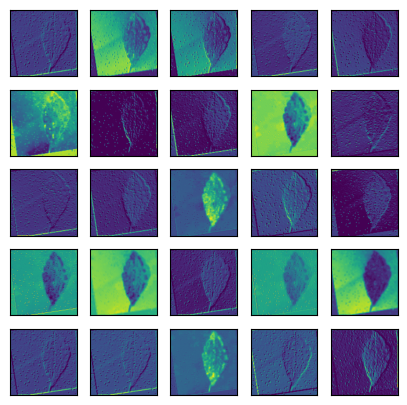

In [ ]:
from matplotlib import pyplot
square=5
ix=1
ax=pyplot.figure(figsize=(5,5))
for i in range(square):
  for j in range(square):
    ax=pyplot.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    pyplot.imshow(feature_maps[0,:,:,ix-1],aspect='auto',cmap="viridis")
    ix+=1


pyplot.savefig("CO1.tiff",format="tiff")
pyplot.show()


In [ ]:
###### For Demo Visualizing 1st convolutional layer output
M_conv_1=Model(inputs=model.inputs, outputs=model.layers[7].output)
M_conv_1.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 555,328 (2.12 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 555,328 (2.12 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


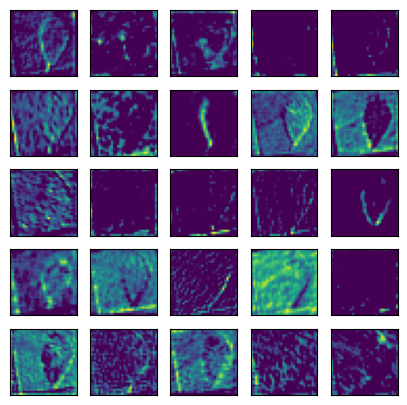

In [ ]:
feature_maps=M_conv_1.predict(img)

from matplotlib import pyplot
square=5
ix=1
ax=pyplot.figure(figsize=(5,5))
for i in range(square):
  for j in range(square):
    ax=pyplot.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    pyplot.imshow(feature_maps[0,:,:,ix-1],aspect='auto',cmap="viridis")
    ix+=1


pyplot.savefig("CO1.tiff",format="tiff")
pyplot.show()


In [ ]:
###### For Demo Visualizing 1st convolutional layer output
M_conv_1=Model(inputs=model.inputs, outputs=model.layers[9].output)
M_conv_1.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,735,488 (6.62 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,735,488 (6.62 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


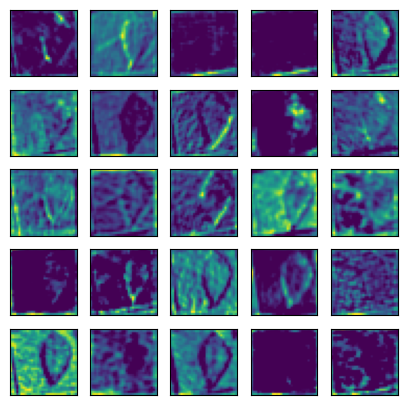

In [ ]:
feature_maps=M_conv_1.predict(img)

from matplotlib import pyplot
square=5
ix=1
ax=pyplot.figure(figsize=(5,5))
for i in range(square):
  for j in range(square):
    ax=pyplot.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    pyplot.imshow(feature_maps[0,:,:,ix-1],aspect='auto',cmap="viridis")
    ix+=1


pyplot.savefig("CO1.tiff",format="tiff")
pyplot.show()


In [ ]:
###### For Demo Visualizing 1st convolutional layer output
M_conv_1=Model(inputs=model.inputs, outputs=model.layers[14].output)
M_conv_1.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,225,344 (31.38 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 8,225,344 (31.38 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


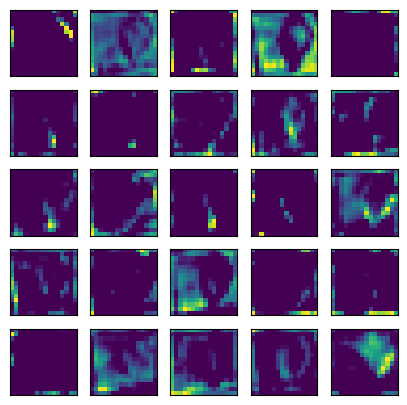

In [ ]:
feature_maps=M_conv_1.predict(img)

from matplotlib import pyplot
square=5
ix=1
ax=pyplot.figure(figsize=(5,5))
for i in range(square):
  for j in range(square):
    ax=pyplot.subplot(square,square,ix)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    pyplot.imshow(feature_maps[0,:,:,ix-1],aspect='auto',cmap="viridis")
    ix+=1


pyplot.savefig("CO1.tiff",format="tiff")
pyplot.show()



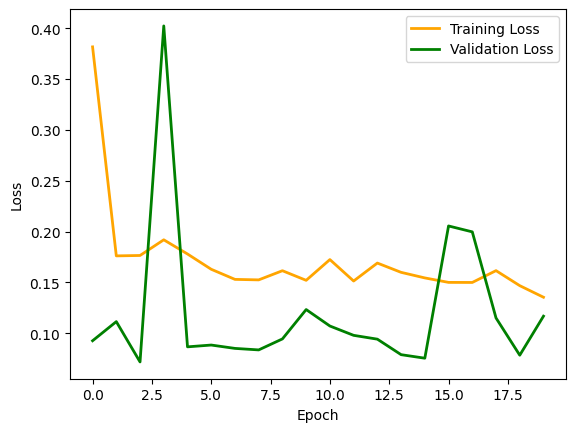

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
''' training loss and validation loss graph '''
epochs = range(20)
plt.plot(epochs, history.history['loss'], 'orange',  label='Training Loss', linewidth=2)
plt.plot(epochs, history.history['val_loss'], 'g',  label='Validation Loss', linewidth=2)
#plt.title('Training vs validation loss')
plt.xlabel('Epoch'); plt.ylabel('Loss');
plt.legend(loc=1)
plt.figure()
plt.show()
pyplot.savefig("Loss.tiff",format="tiff")


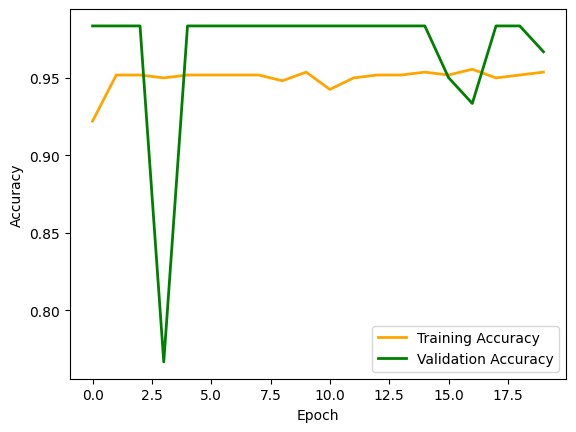

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
''' training accuracy and validation accuracy graph '''
epochs = range(20)
plt.plot(epochs, history.history['accuracy'], 'orange',  label='Training Accuracy', linewidth=2)
plt.plot(epochs, history.history['val_accuracy'], 'g',  label='Validation Accuracy', linewidth=2)
#plt.title('Training vs validation accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy');
plt.legend(loc=4)
plt.figure()
plt.show()
pyplot.savefig("ACC.tiff",format="tiff")


In [ ]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 7s/step


In [ ]:
''' checking accuracy score'''
accuracy = accuracy_score(y_test_arg, Y_pred)
print(accuracy)

0.9666666666666667


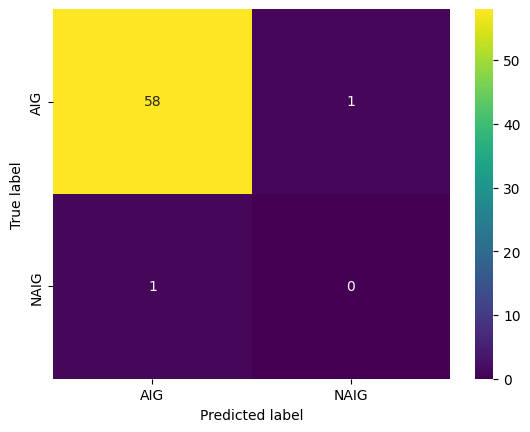

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_arg, Y_pred)
f = sns.heatmap(cm, annot=True, fmt='d', cmap="viridis")
# labels, title and ticks
f.set_xlabel('Predicted label');f.set_ylabel('True label');
#f.set_title('Confusion Matrix');
f.xaxis.set_ticklabels(['AIG', 'NAIG']); f.yaxis.set_ticklabels(['AIG','NAIG']);
pyplot.savefig("CM.tiff",format="tiff")

In [ ]:
# Evaluating Metrices

TP = cm[1][1]
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
print('True Positives:', TP)
print('True Negatives:', TN)
print('False Positives:', FP)
print('False Negatives:', FN)






True Positives: 0
True Negatives: 58
False Positives: 1
False Negatives: 1


In [ ]:
# calculate accuracy
conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

# calculate mis-classification
conf_misclassification = 1- conf_accuracy

# calculate the sensitivity
conf_sensitivity = (TP / float(TP + FN))
# calculate the specificity
conf_specificity = (TN / float(TN + FP))

# calculate precision
conf_precision = (TN / float(TN + FP))
# calculate NPV
conf_NPV = (TN / float(TN + FN))
# calculate f_1 score
conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
print('-'*50)
print(f'Accuracy: {round(conf_accuracy,4)}')
print(f'Mis-Classification: {round(conf_misclassification,4)}')
print(f'Sensitivity: {round(conf_sensitivity,4)}')
print(f'Specificity: {round(conf_specificity,4)}')
print(f'Precision: {round(conf_precision,4)}')
print(f'NPV: {round(conf_NPV,4)}')
print(f'f_1 Score: {round(conf_f1,2)}')

--------------------------------------------------
Accuracy: 0.9667
Mis-Classification: 0.0333
Sensitivity: 0.0
Specificity: 0.9831
Precision: 0.9831
NPV: 0.9831
f_1 Score: 0.0


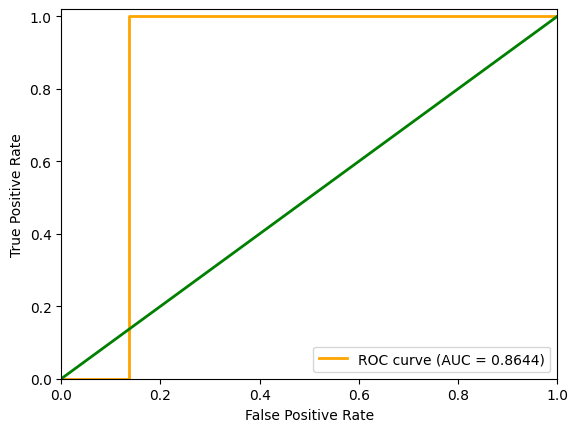

--------------------------------------------------
Accuracy: 0.9667
Mis-Classification: 0.0333
Sensitivity: 0.0
Specificity: 0.9831
Precision: 0.9831
NPV: 0.9831
f_1 Score: 0.0


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate accuracy
conf_accuracy = (float(TP + TN) / float(TP + TN + FP + FN))

# Calculate mis-classification
conf_misclassification = 1 - conf_accuracy

# Calculate sensitivity
conf_sensitivity = (TP / float(TP + FN))

# Calculate specificity
conf_specificity = (TN / float(TN + FP))

# Calculate precision
conf_precision = (TN / float(TN + FP))

# Calculate NPV
conf_NPV = (TN / float(TN + FN))

# Calculate f_1 score
conf_f1 = 4 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))

# Calculate predicted probabilities
y_scores = model.predict_on_batch(X_test)[:, 1]  # Assuming you have a model and input data (X) available

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_arg, y_scores)  # Replace y_true with your true labels

# Calculate AUC score
auc = roc_auc_score(y_test_arg, y_scores)  # Replace y_true with your true labels

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, 'orange',  label='ROC curve (AUC = %0.4f)' % auc, linewidth=2)
plt.plot([0, 1], [0, 1], 'g', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

print('-' * 50)
print(f'Accuracy: {round(conf_accuracy, 4)}')
print(f'Mis-Classification: {round(conf_misclassification, 4)}')
print(f'Sensitivity: {round(conf_sensitivity, 4)}')
print(f'Specificity: {round(conf_specificity, 4)}')
print(f'Precision: {round(conf_precision, 4)}')
print(f'NPV: {round(conf_NPV, 4)}')
print(f'f_1 Score: {round(conf_f1, 2)}')


In [ ]:
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt

# Assuming you have a model named 'model'
layer_index_start = 1
layer_index_end = 15

# Iterate through the desired range of layer indices
for layer_index in range(layer_index_start, layer_index_end + 1):
    # Create a sub-model that outputs the feature maps of the current layer
    sub_model = Model(inputs=model.inputs, outputs=model.layers[layer_index].output)

    # Get the feature maps for a sample input
    feature_maps = sub_model.predict(img)

    # Plot the feature maps
    num_feature_maps = feature_maps.shape[-1]
    square = int(num_feature_maps ** 0.5) + 1
    fig = plt.figure(figsize=(5, 5))

    for i in range(num_feature_maps):
        ax = fig.add_subplot(square, square, i+1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_aspect('equal')
        plt.imshow(feature_maps[0, :, :, i], aspect='auto', cmap="viridis")

    #plt.suptitle(f"Layer Index: {layer_index}")
    plt.savefig(f"feature_maps_{layer_index}.png", format="png")
    plt.show()

Output hidden; open in https://colab.research.google.com to view.